In [4]:
# Import necessary libraries
import pandas as pd


In [5]:
# Load the datasets
orders = pd.read_excel('Sales Data.xls', sheet_name='Orders')
people = pd.read_excel('Sales Data.xls', sheet_name='People')
returns = pd.read_excel('Sales Data.xls', sheet_name='Returns')

In [6]:
# Display the first few rows of each DataFrame to understand the data
print("Orders DataFrame:")
print(orders.head())

print("\nPeople DataFrame:")
print(people.head())

print("\nReturns DataFrame:")
print(returns.head())

Orders DataFrame:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  US-2019-103800 2019-01-03 2019-01-07  Standard Class    DP-13000   
1       2  US-2019-112326 2019-01-04 2019-01-08  Standard Class    PO-19195   
2       3  US-2019-112326 2019-01-04 2019-01-08  Standard Class    PO-19195   
3       4  US-2019-112326 2019-01-04 2019-01-08  Standard Class    PO-19195   
4       5  US-2019-141817 2019-01-05 2019-01-12  Standard Class    MB-18085   

   Customer Name      Segment Country/Region          City  ... Postal Code  \
0  Darren Powers     Consumer  United States       Houston  ...       77095   
1  Phillina Ober  Home Office  United States    Naperville  ...       60540   
2  Phillina Ober  Home Office  United States    Naperville  ...       60540   
3  Phillina Ober  Home Office  United States    Naperville  ...       60540   
4     Mick Brown     Consumer  United States  Philadelphia  ...       19143   

    Region       Product ID     

In [7]:
# Check for missing values
print("Missing values in Orders DataFrame:")
print(orders.isnull().sum())

# Convert date columns to datetime format
orders['Order Date'] = pd.to_datetime(orders['Order Date'])

# Drop duplicate rows, if any
orders = orders.drop_duplicates()

# Reset index after cleaning
orders = orders.reset_index(drop=True)

# Display cleaned Orders DataFrame
print("\nCleaned Orders DataFrame:")
print(orders.head())


Missing values in Orders DataFrame:
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

Cleaned Orders DataFrame:
   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  US-2019-103800 2019-01-03 2019-01-07  Standard Class    DP-13000   
1       2  US-2019-112326 2019-01-04 2019-01-08  Standard Class    PO-19195   
2       3  US-2019-112326 2019-01-04 2019-01-08  Standard Class    PO-19195   
3       4  US-2019-112326 2019-01-04 2019-01-08  Standard Class    PO-19195   
4       5  US-2019-141817 2019-01-05 2019-01-12  Standard Class    MB-18085   

   Customer Name      Segment

In [8]:
# Check for missing values
print("Missing values in People DataFrame:")
print(people.isnull().sum())

# Drop duplicate rows,people.drop_duplicates()

# Reset index after cpeople.reset_index(drop=True)

# Display cleaned People DataFrame
print("\nCleaned People DataFrame:", people.head())
print(people.head())

Missing values in People DataFrame:
Regional Manager    0
Region              0
dtype: int64

Cleaned People DataFrame:     Regional Manager   Region
0    Sadie Pawthorne     West
1        Chuck Magee     East
2  Roxanne Rodriguez  Central
3        Fred Suzuki    South
    Regional Manager   Region
0    Sadie Pawthorne     West
1        Chuck Magee     East
2  Roxanne Rodriguez  Central
3        Fred Suzuki    South


In [9]:
# Check for missing values
print("Missing values in Returns DataFrame:")
print(returns.isnull().sum())

# Drop duplicate rows, if any
returns = returns.drop_duplicates()

# Reset index after cleaning
returns = returns.reset_index(drop=True)

# Display cleaned Returns DataFrame
print("\nCleaned Returns DataFrame:")
print(returns.head())


Missing values in Returns DataFrame:
Returned    0
Order ID    0
dtype: int64

Cleaned Returns DataFrame:
  Returned        Order ID
0      Yes  US-2019-100762
1      Yes  US-2019-100867
2      Yes  US-2019-102652
3      Yes  US-2019-103373
4      Yes  US-2019-103744


In [10]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Display basic statistics for numerical columns in the Orders DataFrame
print("Summary Statistics for Orders DataFrame:")
print(orders.describe())

Summary Statistics for Orders DataFrame:
             Row ID                     Order Date  \
count  10194.000000                          10194   
mean    5097.500000  2021-04-29 11:48:25.002942976   
min        1.000000            2019-01-03 00:00:00   
25%     2549.250000            2020-05-14 00:00:00   
50%     5097.500000            2021-06-25 00:00:00   
75%     7645.750000            2022-05-14 00:00:00   
max    10194.000000            2022-12-30 00:00:00   
std     2942.898656                            NaN   

                           Ship Date         Sales      Quantity  \
count                          10194  10194.000000  10194.000000   
mean   2021-05-03 10:52:45.626839296    228.225854      3.791838   
min              2019-01-07 00:00:00      0.444000      1.000000   
25%              2020-05-19 00:00:00     17.220000      2.000000   
50%              2021-06-28 00:00:00     53.910000      3.000000   
75%              2022-05-18 00:00:00    209.500000      5.000000

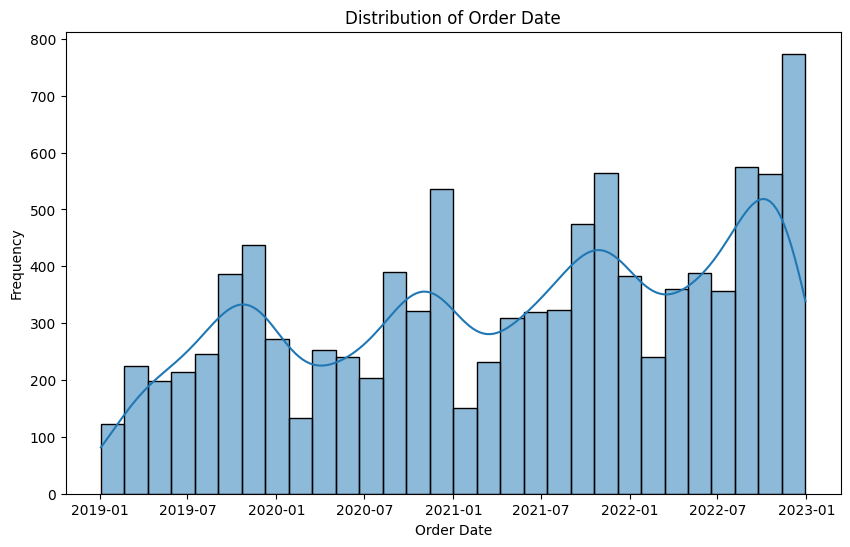

In [12]:
# Visualize the distribution of the 'Order Date' in the Orders DataFrame
plt.figure(figsize=(10, 6))
sns.histplot(orders['Order Date'], bins=30, kde=True)
plt.title('Distribution of Order Date')
plt.xlabel('Order Date')
plt.ylabel('Frequency')
plt.show()


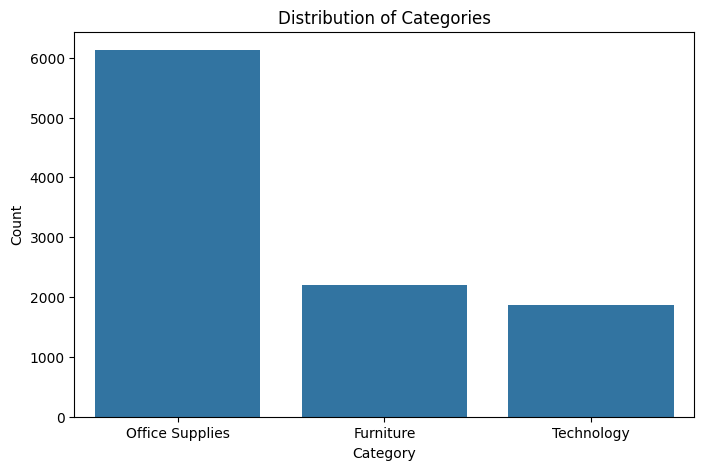

In [13]:
# Visualize the distribution of the 'Category' column in the Orders DataFrame
plt.figure(figsize=(8, 5))
sns.countplot(x='Category', data=orders)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

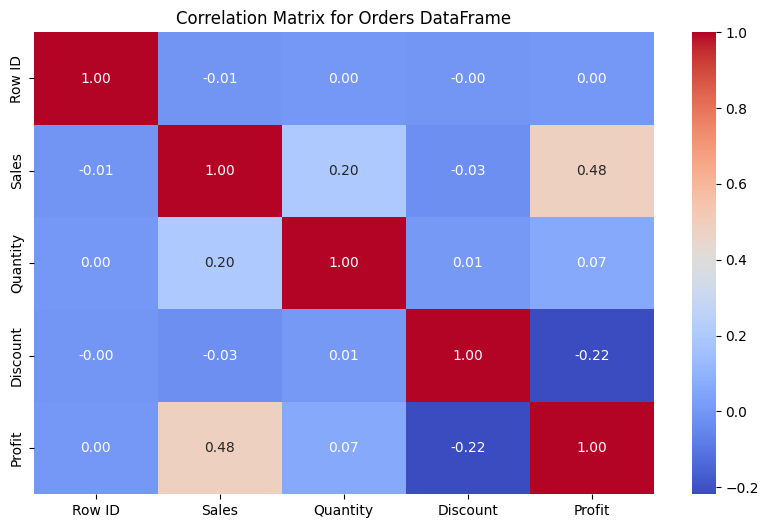

In [16]:
# Exclude non-numeric columns from the correlation matrix
numeric_columns = orders.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = orders[numeric_columns].corr()

# Visualize the correlation matrix for numerical columns in the Orders DataFrame
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Orders DataFrame')
plt.show()


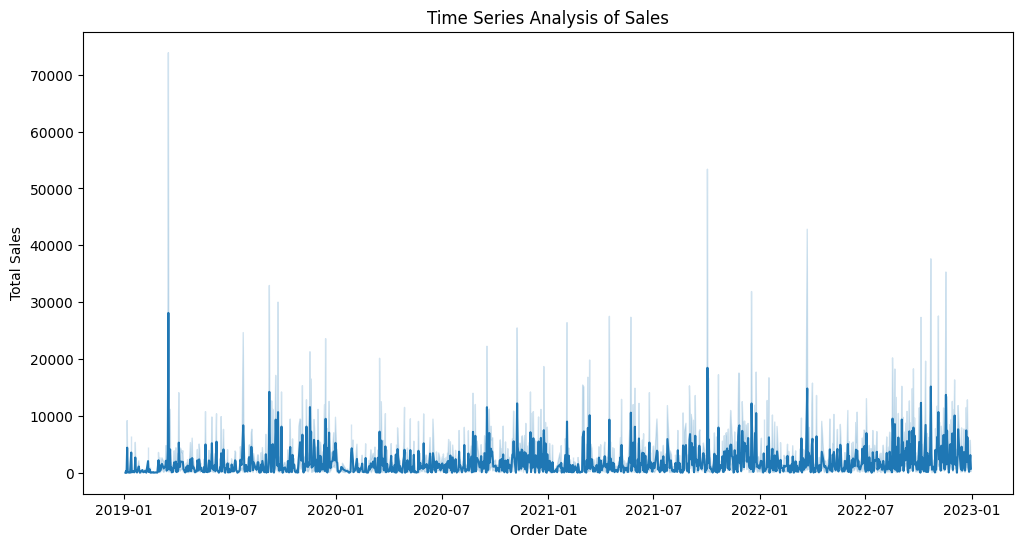

In [22]:
# Time series plot for sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', data=orders, estimator='sum')
plt.title('Time Series Analysis of Sales')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.show()


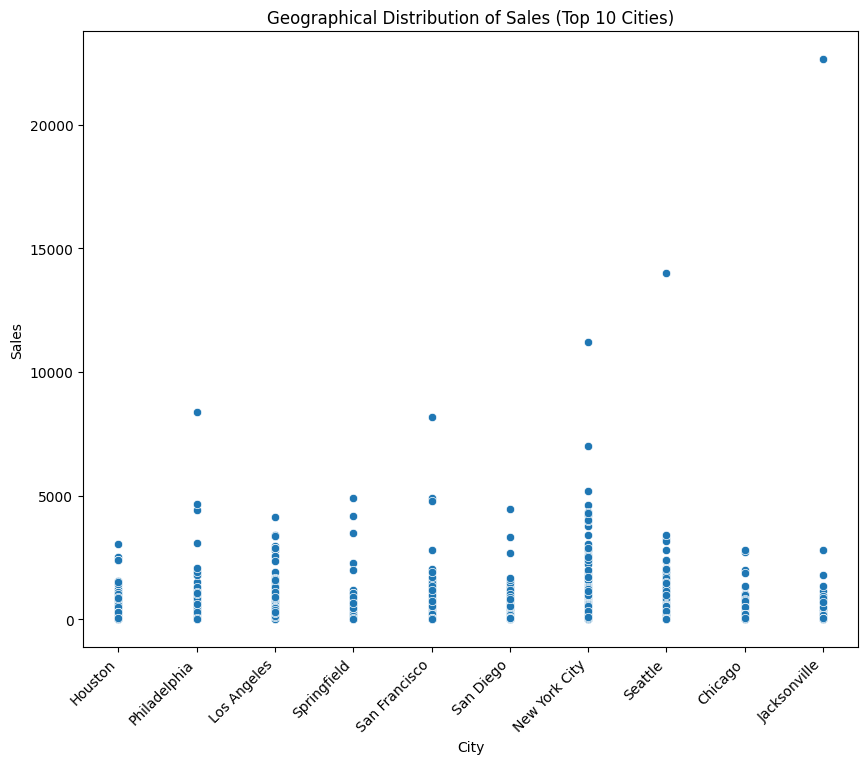

In [27]:
# Identify the top 10 cities by total sales
top_cities = orders.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).index

# Filter the Orders DataFrame for the top 10 cities
orders_top_cities = orders[orders['City'].isin(top_cities)]

# Geographical distribution of sales using a scatter plot for the top 10 cities
plt.figure(figsize=(10, 8))
sns.scatterplot(x='City', y='Sales', data=orders_top_cities)
plt.title('Geographical Distribution of Sales (Top 10 Cities)')
plt.xlabel('City')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.show()
